**Lab 2: Advanced Linear Programming and Sensitivity Analysis**
- Defining more complex linear programming tasks
- Learning different constraint types
- Sensitivity analysis

**Production Optimization Problem**

This program solves a linear programming problem for optimizing production of three products (A, B, and C).

The A can be for example a number of beds, B can be meters of plywood and C can be meters of low quality plywood.
Notice that it does not make sense to produce a half of a bed, so we need to use integer variables for this decision variable.

**Decision Variables:**
- unitsA: Number of units of product A to produce (integer):
- unitsB: Number of units of product B to produce
- unitsC: Number of units of product C to produce

**Objective Function:**
- Maximize profit: 400 PLN per unit A + 300 PLN per unit B + 200 PLN per unit C

**Constraints:**
- Assembly time: 0.3h per A + 0.1h per B + 0.1h per C ≤ 1800 hours
- Quality control: 0.1h per A + 0.08h per B + 0.04h per C ≤ 800 hours
- Packaging: 0.06h per A + 0.04h per B + 0.05h per C ≤ 700 hours


In [ ]:
# In Google Colab, ensure PuLP is installed:
# !pip install pulp

from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD
)

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
# Let's say:
#   - A (number of units of product A) is integer (like beds).
#   - B (number of units of product B) is continuous or integer, depending on your scenario.
#   - C (number of units of product C) is continuous or integer, too.

A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
# Profit values (you can tweak these):
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints

# --- Resource / Time Constraints (same as the previous example, extended if desired) ---
# Example: max available hours in Assembly, Quality Control, and Packaging
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# --- Minimum Demand Constraints ---
# Suppose the company must produce at least 100 units of A, 50 of B, and 80 of C to satisfy orders.
prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# --- Optional Additional Constraints ---
# For instance, if product C requires a special component that is limited:
# Let's say we have only 500 units of that component, and each unit of C consumes 1 unit of that component
# prob += C <= 500, "Special_Component_Limit"

# Alternatively, we might have a ratio constraint, e.g., for product mix synergy:
# For example, we do not want to produce more B than 2 times A
# prob += B <= 2 * A, "Mix_Ratio_Constraint"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print results
print("Status:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

Status: 1
A = 1894.0
B = 2948.1667
C = 9368.6667
Total profit =  3515783.3499999996


## 2. Interpreting the Extended Model



### Minimum Demand Constraints:
- E.g. `A >= 100` ensures at least 100 units of A are produced.

### Optional Constraints:
- Resource constraints, ratio constraints, or any other real-world limitations.



## 3. Performing Sensitivity Analysis

### Approach A: Manual Parameter Variation
- **Change the availability of resources:**
  - For example, reduce the 1800 hours of Assembly to 1500, solve again, and observe the new optimal solution.
- **Change the profit coefficients:**
  - If the profit for product C increases to 250, does the solution shift toward more C?
- **Change the minimum demand:**
  - If the market demands 150 units of A instead of 100, how does that affect the objective?

## Exercise 1: Minimum Demand and New Constraints

- Implement the code above and check if it finds a feasible solution.
- Alter the minimum demands:
  - Increase or decrease them to see if the solution changes drastically.
- Interpret which constraints become "binding" (fully used, the value of the constraint is equal to its limit) in the optimal solution.

In [2]:
!pip install pulp

from pulp import LpProblem, LpVariable, LpMaximize, LpInteger, value, PULP_CBC_CMD

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables (All Integer)
A = LpVariable("A", lowBound=0, cat=LpInteger)  # Integer (beds)
B = LpVariable("B", lowBound=0, cat=LpInteger)  # Integer (meters of plywood)
C = LpVariable("C", lowBound=0, cat=LpInteger)  # Integer (low-quality plywood)

# 3) Define Objective Function (Profit Maximization)
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A * A + profit_B * B + profit_C * C, "Profit_Objective"

# 4) Define Constraints

# Assembly time constraint
prob += 0.3 * A + 0.1 * B + 0.1 * C <= 1800, "Assembly_Hours"

# Quality control constraint
prob += 0.1 * A + 0.08 * B + 0.04 * C <= 800, "Quality_Control_Hours"

# Packaging constraint
prob += 0.06 * A + 0.04 * B + 0.05 * C <= 700, "Packaging_Hours"

# ---- Test 1: Increase Minimum Demand ----
# Uncomment these lines for high demand scenario
# prob += A >= 200, "Min_Demand_A"
# prob += B >= 100, "Min_Demand_B"
# prob += C >= 150, "Min_Demand_C"

# ---- Test 2: Decrease Minimum Demand ----
# Uncomment these lines for low demand scenario
# prob += A >= 50, "Min_Demand_A"
# prob += B >= 20,  "Min_Demand_B"
# prob += C >= 40,  "Min_Demand_C"

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=True))  # Show solver output for debugging

# Print results
print("\nStatus:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

# Print which constraints are binding
print("\nBinding Constraints:")
for name, constraint in prob.constraints.items():
    left_side = constraint.value()
    right_side = constraint.constant
    if abs(left_side - right_side) < 1e-5:  # Small tolerance to check equality
        print(f"{name} is binding (fully utilized).")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 84.5 MB/s eta 0:00:00

Status: 1
A = 1893.0
B = 2949.0
C = 9369.0
Total profit =  3515700.0

Binding Constraints:


## Exercise 2: Sensitivity Analysis on Resource Availability

- Create a loop that iterates over possible Assembly hours: 1600, 1800, 2000.
- For each iteration, solve the problem and record:
  - The optimal quantity of A, B, C.
  - The total profit.
- Plot or tabulate results to see the trend (if you like, e.g., in a DataFrame).

   Assembly Hours       A          B          C  Total Profit
0            1600   631.0  4316.4167  9789.6667    3505258.35
1            1800  1894.0  2948.1667  9368.6667    3515783.35
2            2000  3157.0  1579.9167  8947.6667    3526308.35


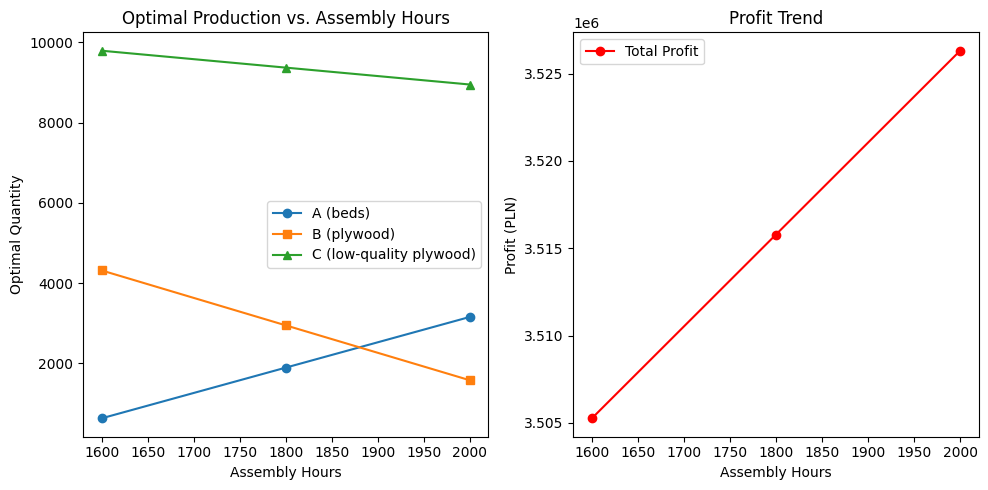

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMaximize, LpInteger, value, PULP_CBC_CMD

# Define the range of Assembly hours to test
assembly_hours_range = [1600, 1800, 2000]

# Store results
results = []

for assembly_hours in assembly_hours_range:
    # Create the LP problem
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Decision variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)  # Integer variable
    B = LpVariable("B", lowBound=0)  # Continuous variable
    C = LpVariable("C", lowBound=0)  # Continuous variable

    # Objective function: Maximize profit
    prob += 400*A + 300*B + 200*C, "Profit_Objective"

    # Constraints (varying assembly constraint)
    prob += 0.3*A + 0.1*B + 0.1*C <= assembly_hours, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

    # Minimum demand constraints
    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50, "Min_Demand_B"
    prob += C >= 80, "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))

    # Store results
    results.append({
        "Assembly Hours": assembly_hours,
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "Total Profit": value(prob.objective)
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame
print(df_results)

# Plot results
plt.figure(figsize=(10, 5))

# Subplot for product quantities
plt.subplot(1, 2, 1)
plt.plot(df_results["Assembly Hours"], df_results["A"], marker='o', label="A (beds)")
plt.plot(df_results["Assembly Hours"], df_results["B"], marker='s', label="B (plywood)")
plt.plot(df_results["Assembly Hours"], df_results["C"], marker='^', label="C (low-quality plywood)")
plt.xlabel("Assembly Hours")
plt.ylabel("Optimal Quantity")
plt.legend()
plt.title("Optimal Production vs. Assembly Hours")

# Subplot for profit
plt.subplot(1, 2, 2)
plt.plot(df_results["Assembly Hours"], df_results["Total Profit"], marker='o', color='red', label="Total Profit")
plt.xlabel("Assembly Hours")
plt.ylabel("Profit (PLN)")
plt.title("Profit Trend")
plt.legend()

plt.tight_layout()
plt.show()


## Exercise 3 (Optional): Binary Decision Constraints

- Add a binary variable that indicates whether you open a specific production line (1) or not (0).
- If that line is closed, the hours available might be reduced or zero.
- Solve and see how the solver decides the best strategy (to open or not to open).

# Bonus:
 - Add sliders to show the values of the variables and the constraints.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from pulp import *

def solve_optimization(profit_A_value=400):
    # Create the optimization problem (maximize profit)
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Define Decision Variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
    B = LpVariable("B", lowBound=0)  # continous meters of plywood
    C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

    # Profit values
    profit_A = profit_A_value
    profit_B = 300
    profit_C = 200

    # Define Objective Function
    prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

    # Define Constraints
    # Resource / Time Constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

    # Minimum Demand Constraints
    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50,  "Min_Demand_B"
    prob += C >= 80,  "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

    # Return results
    results = {
        "status": LpStatus[prob.status],
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "total_profit": value(prob.objective)
    }

    return results

# Define slider for profit_A
profit_A_slider = widgets.FloatSlider(
    value=400,
    min=0,
    max=800,
    step=10,
    description='Profit A',
    continuous_update=False
)

# Output widget to display results
output = widgets.Output()

# Function to update results when slider changes
def update_results(change):
    with output:
        output.clear_output()
        results = solve_optimization(profit_A_slider.value)
        print(f"Status: {results['status']}")
        print(f"A = {results['A']}")
        print(f"B = {results['B']}")
        print(f"C = {results['C']}")
        print(f"Total profit = {results['total_profit']}")

# Connect the slider to the update function
profit_A_slider.observe(update_results, names='value')

# Display the slider and initial results
display(profit_A_slider)
display(output)

# Show initial results
update_results(None)

FloatSlider(value=400.0, continuous_update=False, description='Profit A', max=800.0, step=10.0)

Output()